#Artificial Neural Network

This notebook will classify whether the bank customers will exit or not using CHURN Modelling dataset. 
For doing this, we use Artificial Neural Network using KERAS library.

### Part 1 : Data Pre-Processing

In [0]:
!pip install -q keras #First install Keras lib

In [0]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Importing Dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Artificial_Neural_Network/Churn_Modelling.csv')

In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [0]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [0]:
#Geography and Gender are still categorical variable, so we change this to numerical val using dummy variable
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [0]:
X = pd.concat([X,geography,gender],axis=1)

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [0]:
#Dropping the Geography and Gender column 
X = X.drop(['Geography','Gender'],axis=1)

In [0]:
#Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Part 2 : Lets make Artificial Neural Network !

In [15]:
#Importing Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
#Initializing ANN
classifier = Sequential()

In [0]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [0]:
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [0]:
#Adding the third hidden layer
classifier.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu'))

In [0]:
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [0]:
#Compling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
#Fitting the ANN to training set
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,nb_epoch=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 5s 845us/step - loss: 0.6600 - accuracy: 0.6699 - val_loss: 0.4828 - val_accuracy: 0.7952
Epoch 2/100
5359/5359 [==============================] - 3s 523us/step - loss: 0.4690 - accuracy: 0.7998 - val_loss: 0.4653 - val_accuracy: 0.7933
Epoch 3/100
5359/5359 [==============================] - 3s 509us/step - loss: 0.4496 - accuracy: 0.8015 - val_loss: 0.4551 - val_accuracy: 0.7959
Epoch 4/100
5359/5359 [==============================] - 3s 508us/step - loss: 0.4385 - accuracy: 0.8085 - val_loss: 0.4494 - val_accuracy: 0.7974
Epoch 5/100
5359/5359 [==============================] - 3s 525us/step - loss: 0.4337 - accuracy: 0.8095 - val_loss: 0.4437 - val_accuracy: 0.7989
Epoch 6/100
5359/5359 [==============================] - 3s 513us/step - loss: 0.4300 - accuracy: 0.8102 - val_loss: 0.4430 - val_accuracy: 0.8042
Epoch 7/100
5359/5359 [==============================] - 3s 503us/step

In [23]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


###Part 3 : Making prediction and evaluating the model

In [0]:
#Predicting for test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [25]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [26]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1506   89]
 [ 185  220]]


In [27]:
#Evaluate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print(score)

0.863


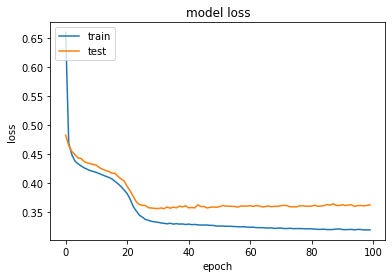

In [28]:
#summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

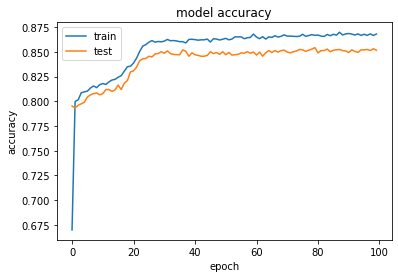

In [31]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()